<a href="https://colab.research.google.com/github/asmizaffor/Breast-Cancer-Detection-using-CNN-/blob/main/TM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FAKE NEWS DETECTION USING NLTK**

Syeda Asmi Zaffor

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
folder_path = '/content/drive/MyDrive/newsss'
print("Files in folder:")
print(os.listdir(folder_path))

Files in folder:
['Fake.csv', 'True.csv']


In [10]:
df_fake = pd.read_csv('/content/drive/MyDrive/newsss/Fake.csv')
df_true = pd.read_csv('/content/drive/MyDrive/newsss/True.csv')

# Add a 'label' column to identify fake (0) and true (1) news
df_fake['label'] = 0
df_true['label'] = 1

# Combine the two dataframes
df = pd.concat([df_fake, df_true], ignore_index=True)

# Shuffle the dataset to mix fake and true news entries
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Combined DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Combined DataFrame Head:
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  

DataFrame Info:
<class '

In [11]:
# Initialize PorterStemmer for stemming
ps = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

def preprocess_text(content):
    # Keep only alphabetic characters, remove others
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    # Split into list of words (tokenize)
    stemmed_content = stemmed_content.split()
    # Remove stopwords and perform stemming
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords_set]
    # Join the words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

print("Preprocessing function is ready.")

Preprocessing function is ready.


In [12]:
# Combine title and text for a more comprehensive feature
df['content'] = df['title'] + ' ' + df['text']

print("Applying preprocessing to the content... This may take a few minutes.")
df['stemmed_content'] = df['content'].apply(preprocess_text)
print("Preprocessing complete.")

# Separate features (X) and labels (y)
X = df['stemmed_content'].values
y = df['label'].values

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

Applying preprocessing to the content... This may take a few minutes.
Preprocessing complete.

Shape of features (X): (44898,)
Shape of labels (y): (44898,)


In [13]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
X = vectorizer.fit_transform(X)

print(f"Text data has been vectorized. Shape of TF-IDF matrix: {X.shape}")

Text data has been vectorized. Shape of TF-IDF matrix: (44898, 89868)


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the PassiveAggressiveClassifier model
model = PassiveAggressiveClassifier(max_iter=100)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Accuracy: 99.49%

Confusion Matrix:
[[4677   19]
 [  27 4257]]


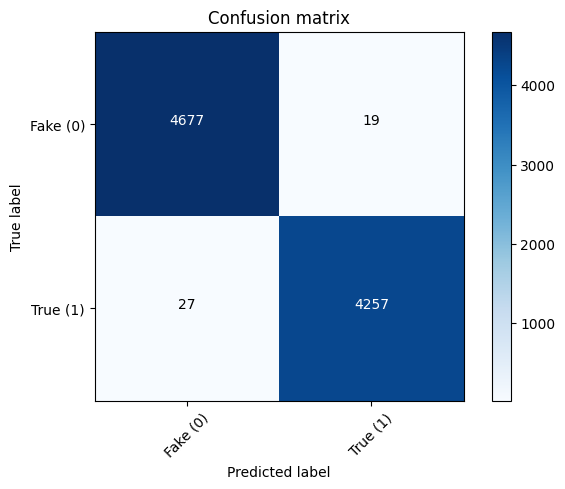

In [15]:
# Testing
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting the confusion matrix
plot_confusion_matrix(cm, classes=['Fake (0)', 'True (1)'])

In [16]:
# Function to predict on new input
def predict_news(news_text):
    # Preprocess the input text
    processed_text = preprocess_text(news_text)
    # Vectorize the preprocessed text
    vectorized_text = vectorizer.transform([processed_text])
    # Predict using the trained model
    prediction = model.predict(vectorized_text)

    if prediction[0] == 0:
        return "🚨 This looks like FAKE news."
    else:
        return "✅ This looks like REAL news."

# Example usage with a new piece of text
news_text = "Scientists have discovered a new species of glowing frog in the Amazon rainforest. The discovery highlights the incredible biodiversity of the region and the need for its conservation."
print(f"Input: '{news_text}'")
print(f"Prediction: {predict_news(news_text)}")

print("-" * 20)

# Another example
news_text_fake = "BREAKING: The moon has been officially declared a giant block of cheese by international space agencies."
print(f"Input: '{news_text_fake}'")
print(f"Prediction: {predict_news(news_text_fake)}")

Input: 'Scientists have discovered a new species of glowing frog in the Amazon rainforest. The discovery highlights the incredible biodiversity of the region and the need for its conservation.'
Prediction: 🚨 This looks like FAKE news.
--------------------
Input: 'BREAKING: The moon has been officially declared a giant block of cheese by international space agencies.'
Prediction: 🚨 This looks like FAKE news.
